# Regression Analysis
- Univariant linear regression focuses to determine relationship between one independent(exploratory variable) variable and one dependent variable

- Simple regression(1 variable) - omits some important factors, which will result in an estimated error (Usefull but not perfect)

Regression model can be written as -- Y = alpha + beta*X + error

In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [21]:
data = pd.read_excel('data/Housing.xlsx')
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [22]:
data.shape, data.size

((20, 5), 100)

In [23]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


## Univariate Regression
- Univariant linear regression focuses to determine relationship between one independent(exploratory variable) variable and one dependent variable

In [26]:
Y = data['House Price']
X = data['House Size (sq.ft.)']

In [27]:
X[:10]

0    1940
1    1300
2    1420
3    1680
4    1270
5    1850
6    1000
7    1100
8    1600
9    1000
Name: House Size (sq.ft.), dtype: int64

In [28]:
Y[:10]

0    1116000
1     860000
2     818400
3    1000000
4     640000
5    1010000
6     600000
7     700000
8    1100000
9     570000
Name: House Price, dtype: int64

Ploting House price with Lot size

Text(0.5, 0, 'Lot size in square feet')

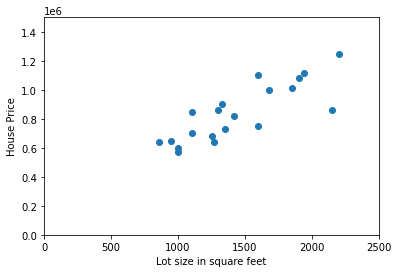

In [36]:
plt.scatter(X, Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('Lot size in square feet')

## R square 

- In case of sample observation errors(distance of the data point from best fitting line) are called residuals

- The best fitting line minimizes the sum of the squared residuals
- The cofficients found with this technique are called OSL estimates (Ordinary least square estimates)
- Not all regressions are not equal and to compare explanatory power we use **r square**
- Total sum of square(TSS) provides a sense of the vaiability of data = Sum(x - mean(x))^2 


**R square = 1 -  sum squared regression (SSR)/(Total sum of square(TSS))**
- R square varies between 0%-100%. The higher it is, the more predictive power the model has
- R square > 30% = solid indicators

In [37]:
 X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [38]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.13e-06
Time:                        18:09:52   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Alpha, Beta, R^2

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [40]:
slope

401.91628631922595

In [41]:
intercept

260806.2360560964

In [42]:
r_value

0.8235775534696924

In [43]:
r_value**2

0.678279986579124

In [44]:
p_value

8.129642377231308e-06

In [45]:
std_err

65.24299510636492

Here r square is 19.9% 

# Multivariant Regression Analysis
- Used to establish relationship between one independent variable and more than one dependent variable

In [46]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [47]:
data.shape

(20, 5)

Independent Variables: **"House Size (sq.ft.)", "Number of Rooms"**

In [49]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
Y = data['House Price']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.77e-05
Time:                        18:14:26   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Independent Variables: **"House Size (sq.ft.)", "Year of Construction"**

In [51]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.26e-05
Time:                        18:14:47   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: **"Number of Rooms", "Year of Construction"**


In [53]:

X = data[['Number of Rooms', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           6.79e-05
Time:                        18:15:13   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""